In [1]:
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("inter_choco_rating.csv")
df.head()

,rating,CQ,sweetness,acidity,bitterness,roast,intensity,complexity,structure,length,appearance,aroma,mouthfeel,flavor,quality,aroma_struct,aroma_mouthfeel,flavor_length,flavor_compl,log_cocoa_perc
0,2.5,57.0,55.0,48.0,37.0,62.0,51.0,43.0,41.0,29.0,74.0,72.0,72.0,81.4,83.0,2952.0,5184.0,2360.6,3500.2,4.174387
1,4.0,53.0,42.0,40.0,49.0,71.0,37.0,36.0,80.0,82.0,92.0,82.0,85.3,88.4,86.5,6560.0,6994.6,7248.8,3182.4,4.317488
2,3.5,44.0,48.0,76.0,50.0,63.0,45.0,52.0,39.0,81.0,100.0,80.0,82.0,86.4,87.0,3120.0,6560.0,6998.4,4492.8,4.317488
3,4.0,60.0,56.0,76.0,20.0,68.0,64.0,62.0,83.0,51.0,100.0,73.0,90.7,89.0,90.0,6059.0,6621.1,4539.0,5518.0,4.174387
4,3.5,23.0,21.0,8.0,70.0,76.0,52.0,10.0,78.0,69.0,92.0,84.0,83.3,84.2,82.5,6552.0,6997.2,5809.8,842.0,4.442651


In [3]:
#create a training sample of 80% of our data
df_train = df.sample(frac=0.8, random_state=5)
#test sample of 20% of our data
df_test = df.drop(df_train.index, axis=0)

In [4]:
#seperate training
y_train = df_train['rating']
x_train = df_train.iloc[:,1:]
#seperate testing
y_test = df_train['rating']
x_test = df_train.iloc[:,1:]

In [5]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(regression, x_train, y_train, scoring='r2', cv=crossvalidation))
print('baseline: ', baseline)

baseline:  0.8632945382439855


In [6]:
#model
df_sm = sm.add_constant(x_train)
results = sm.OLS(y_train, df_sm).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     410.5
Date:                Sun, 21 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:50:45   Log-Likelihood:                -549.87
No. Observations:                1094   AIC:                             1140.
Df Residuals:                    1074   BIC:                             1240.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2006      0.533      0.377      0.707      -0.845       1.246
CQ                  0.0028      0.001      3.942      0.000       0.001       0.004
sweetness           0.0013      0.001      1.458      0.145      -0.000       0.003
acidity             0.0015      0.001      2.151      0.032       0.000       0.003
bitterness          0.0009      0.001      1.037      0.300      -0.001       0.003
roast              -0.0003      0.001     -0.390      0.697      -0.002       0.001
intensity          -0.0005      0.001     -0.553      0.581      -0.002       0.001
complexity         -0.0384      0.005     -7.271      0.000      -0.049      -0.028
structure          -0.0133      0.005     -2.853      0.004      -0.022      -0.004
length             -0.0303      0.005     -6.188      0.000      -0.040      -0.021
appearance          0.0064      0.001      6.452      0.000       0.004       0.008
aroma              -0.0197      0.007     -2.949      0.003      -0.033      -0.007
mouthfeel          -0.0017      0.006     -0.265      0.791      -0.014       0.011
flavor              0.0030      0.003      0.889      0.374      -0.004       0.010
quality             0.0181      0.001     12.050      0.000       0.015       0.021
aroma_struct        0.0002   5.86e-05      3.848      0.000       0.000       0.000
aroma_mouthfeel     0.0003   8.58e-05      3.162      0.002       0.000       0.000
flavor_length       0.0004   6.02e-05      6.127      0.000       0.000       0.000
flavor_compl        0.0005   6.08e-05      8.017      0.000       0.000       0.001
log_cocoa_perc     -0.0162      0.030     -0.546      0.585      -0.074       0.042
==============================================================================
Omnibus:                     1060.522   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           154481.289
Skew:                          -4.027   Prob(JB):                         0.00
Kurtosis:                      60.655   Cond. No.                     4.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We drop the following variables because they are not significant as a predictor based on the p-value:
- sweetness 
- bitterness 
- roast
- intensity
- mouthfeel
- flavor
- log_cocoa_perc


In [7]:
not_sig_cols = ['sweetness', 'bitterness', 'roast', 'intensity', 'mouthfeel', 'flavor', 'log_cocoa_perc']
#drop the columns for our train data
x_train = x_train.drop(not_sig_cols, axis=1)
#drop the columns for our test data
x_test = x_test.drop(not_sig_cols, axis=1)

In [8]:
x_train.head()

,CQ,acidity,complexity,structure,length,appearance,aroma,quality,aroma_struct,aroma_mouthfeel,flavor_length,flavor_compl
748,28.0,21.0,14.0,27.0,46.0,78.0,81.0,79.5,2187.0,6642.0,3974.4,1209.6
754,64.0,13.0,22.0,44.0,63.0,74.0,71.0,78.5,3124.0,6106.0,5418.0,1892.0
1076,53.0,69.0,31.0,52.0,34.0,96.0,64.0,69.5,3328.0,4224.0,2448.0,2232.0
1351,43.0,24.0,41.0,90.0,78.0,88.0,89.0,93.5,8010.0,8366.0,7144.8,3755.6
912,32.0,34.0,31.0,64.0,76.0,86.0,81.0,77.5,5184.0,7290.0,6292.8,2566.8


In [9]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(regression, x_train, y_train, scoring='r2', cv=crossvalidation))
print('baseline: ', baseline)

baseline:  0.8695976604247964


In [10]:
#create model
df_sm = sm.add_constant(x_train)
results = sm.OLS(y_train, df_sm).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     651.2
Date:                Sun, 21 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:50:45   Log-Likelihood:                -552.12
No. Observations:                1094   AIC:                             1130.
Df Residuals:                    1081   BIC:                             1195.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2966      0.251      1.181      0.238      -0.196       0.790
CQ                  0.0027      0.001      3.985      0.000       0.001       0.004
acidity             0.0015      0.001      2.167      0.030       0.000       0.003
complexity         -0.0404      0.005     -7.965      0.000      -0.050      -0.030
structure          -0.0129      0.004     -2.913      0.004      -0.022      -0.004
length             -0.0331      0.003     -9.623      0.000      -0.040      -0.026
appearance          0.0063      0.001      6.337      0.000       0.004       0.008
aroma              -0.0177      0.003     -5.116      0.000      -0.024      -0.011
quality             0.0185      0.001     12.638      0.000       0.016       0.021
aroma_struct        0.0002   5.54e-05      3.954      0.000       0.000       0.000
aroma_mouthfeel     0.0002   1.93e-05     12.884      0.000       0.000       0.000
flavor_length       0.0004   4.13e-05      9.714      0.000       0.000       0.000
flavor_compl        0.0005   5.82e-05      8.772      0.000       0.000       0.001
==============================================================================
Omnibus:                     1074.892   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           157577.456
Skew:                          -4.123   Prob(JB):                         0.00
Kurtosis:                      61.214   Cond. No.                     2.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We removed some indignificant variables as predictors towards our target variable, rating, and it has not done anything to move the R^2 value.

## model our prediction

In [11]:
conn = "+".join(list(x_train.columns))
f = 'rating~' + conn
model = ols(formula=f, data=df_train).fit()

### see how well our model does

In [12]:
#predict using information we know
y_pred = model.predict(x_train)

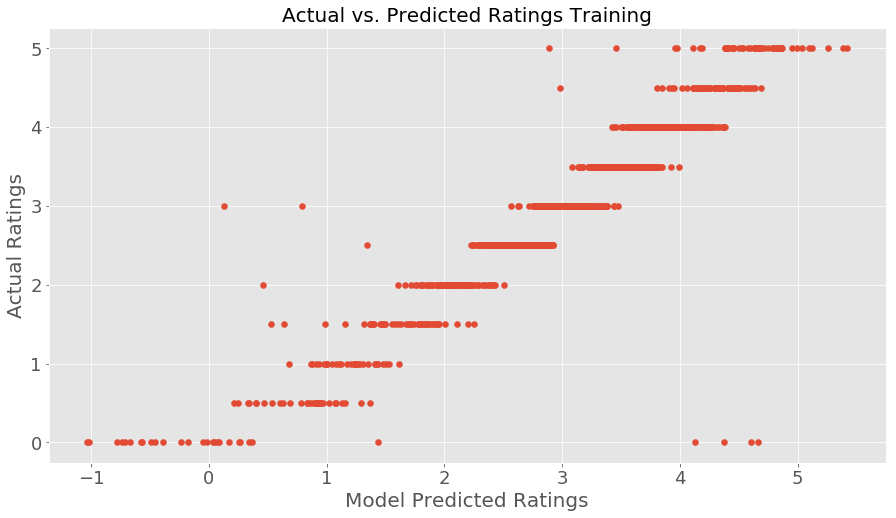

In [13]:
#compare with the actual values
plt.figure(figsize=(15,8))
plt.style.use('ggplot')

plt.scatter(y_pred, y_train)
plt.xlabel('Model Predicted Ratings', size=20)
plt.xticks(size=18)
plt.ylabel('Actual Ratings', size=20)
plt.yticks(size=18)
plt.title('Actual vs. Predicted Ratings Training', size=20)
plt.show()

There are negative rating prediction values which is clearly wrong. 

In [14]:
#get the variance of the two
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_train)
mse 

0.1606516680244428

In [15]:
#Root Mean Squared Error
rmse = np.sqrt(mse)
rmse 

0.40081375727941626

test out the testing data

In [16]:
y_pred_test = model.predict(x_test)

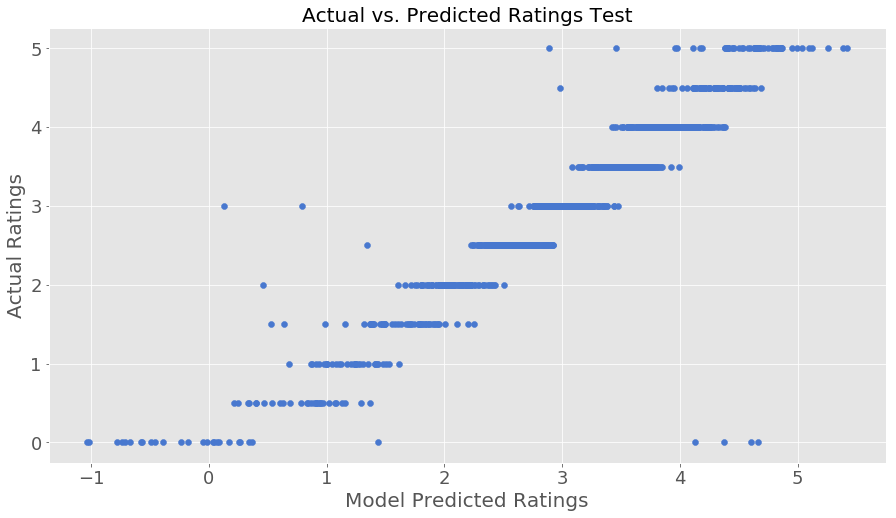

In [17]:
#compare with the actual values
plt.figure(figsize=(15,8))
plt.style.use('seaborn-muted')

plt.scatter(y_pred_test, y_test)
plt.xlabel('Model Predicted Ratings', size=20)
plt.xticks(size=18)
plt.ylabel('Actual Ratings', size=20)
plt.yticks(size=18)
plt.title('Actual vs. Predicted Ratings Test', size=20)
plt.show()

In [18]:
#get the variance of the two
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred_test, y_test)
mse 

0.1606516680244428

In [19]:
#Root Mean Squared Error
rmse = np.sqrt(mse)
rmse 

0.40081375727941626